In [ ]:
import pandas as pd
path_annotations='output71_HI.txt' #file con le annotazioni predette
rows=[]
with open(path_annotations, 'r', encoding='utf-8') as file:
    for line in file:
        parts = line.strip().split('\t')

        if len(parts) > 6:
            parts = parts[:5] + [' '.join(parts[5:])]
        rows.append(parts)

df_split_output = pd.DataFrame(rows, columns=["File", "Name", "Start", "End", "Role","Descriptor"])
df_split_output.head()


,File,Name,Start,End,Role,Descriptor
0,HI_26.txt,मोदी,1123,1126,Protagonist,Guardian
1,HI_26.txt,भारत,3085,3088,Protagonist,Peacemaker
2,HI_26.txt,राष्ट्रपति वोलोदोमीर,3540,3559,Innocent,Victim
3,HI_26.txt,रूस,3614,3616,Antagonist,Instigator
4,HI_26.txt,कीव,3621,3623,Innocent,Victim


In [ ]:
import pandas as pd
path_annotations_corrette='subtask-1-annotations.txt' #file con le annotazioni corrette
rows=[]
with open(path_annotations_corrette, 'r', encoding='utf-8') as file:
    for line in file:
        parts = line.strip().split('\t')

        if len(parts) > 6:
            parts = parts[:5] + [' '.join(parts[5:])]

        rows.append(parts)

df_split_corrette = pd.DataFrame(rows, columns=["File", "Name", "Start", "End", "Role","Descriptor"])
df_split_corrette.head()

,File,Name,Start,End,Role,Descriptor
0,HI_26.txt,मोदी,1123,1126,Protagonist,Guardian
1,HI_26.txt,भारत,3085,3088,Protagonist,Peacemaker
2,HI_26.txt,राष्ट्रपति वोलोदोमीर,3540,3559,Antagonist,Foreign Adversary
3,HI_26.txt,रूस,3614,3616,Antagonist,Instigator
4,HI_26.txt,कीव,3621,3623,Innocent,Victim


In [ ]:
from sklearn.metrics import multilabel_confusion_matrix
import numpy as np

def crea_matrice_confusione_multilabel(y_true, y_pred):
    """
    Funzione per creare la matrice di confusione per un problema multilabel
    """
    matrice_confusione = multilabel_confusion_matrix(y_true, y_pred)
    return matrice_confusione

In [ ]:
def crea_vettore(df):
  res=[]
  for index, row in df.iterrows():
    if row['Descriptor'] is None:
      row['Descriptor']=''
    desc=row['Descriptor'].lower()
    list_desc=desc.split()

    if 'foreign' in list_desc:
      list_desc.remove('foreign')
      list_desc.remove('adversary')
      list_desc.append('foreign adversary')
    res.append(list_desc)

  return res

def trova_lista(indice, dati):
    for item in dati:
        if item[0] == indice:
            return item[1]
    return None

y_true=crea_vettore(df_split_corrette)
y_pred=crea_vettore(df_split_output)

print(len(y_true))
print(len(y_pred))

no_label=0
def separa_etichetta(y_true, y_pred):
    corretta = []
    predetta = []
    no_label=0

    for true_labels, pred_labels in zip(y_true, y_pred):
        len_true=len(true_labels)

        if len(pred_labels)==0:
          continue
        for label in true_labels:
            corretta.append(label)

        for label in pred_labels:
          aggiunte=0
          for i in range(len_true):
            predetta.append(label)
            aggiunte+=1


        if len(predetta)!=len(corretta):
          print("ciao")
          print(true_labels)
          print(pred_labels)

    print(no_label)
    return corretta, predetta

y_true, y_pred = separa_etichetta(y_true, y_pred)

print(y_pred)
print(y_true)


280
280
0
['guardian', 'peacemaker', 'victim', 'instigator', 'victim', 'victim', 'guardian', 'guardian', 'forgotten', 'victim', 'guardian', 'saboteur', 'saboteur', 'peacemaker', 'foreign adversary', 'peacemaker', 'peacemaker', 'virtuous', 'virtuous', 'tyrant', 'victim', 'victim', 'deceiver', 'foreign adversary', 'virtuous', 'foreign adversary', 'foreign adversary', 'foreign adversary', 'victim', 'foreign adversary', 'foreign adversary', 'victim', 'victim', 'guardian', 'guardian', 'foreign adversary', 'peacemaker', 'saboteur', 'saboteur', 'saboteur', 'deceiver', 'rebel', 'victim', 'foreign adversary', 'guardian', 'guardian', 'guardian', 'tyrant', 'foreign adversary', 'foreign adversary', 'rebel', 'foreign adversary', 'instigator', 'foreign adversary', 'deceiver', 'deceiver', 'victim', 'rebel', 'scapegoat', 'saboteur', 'foreign adversary', 'spy', 'tyrant', 'foreign adversary', 'tyrant', 'underdog', 'virtuous', 'guardian', 'victim', 'victim', 'victim', 'virtuous', 'virtuous', 'virtuous', 

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, y_pred)
print(cm)

[[ 0  0  0  1  0  3  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  2  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1]
 [ 0  0  0  9  0  1  1  0  0  0  0  3  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  7  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  1  0]
 [ 0  0  0  2  0 20  0  1  0  3  0  3  0  3  0  0  0  0  2  1  2  2]
 [ 0  0  0  0  0  0  2  1  0  0  0  0  0  0  0  0  0  0  0  4  1  0]
 [ 0  0  0  0  0  9  0 27  0  0  0  3  3  0  0  0  0  0  0  2  1 10]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0  0  2  0  0  1  0  0  0  0  0  3  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  2  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  3  0  0  0 17  0  0  0  0  0  0  0  0  0  1]
 [ 0  0  0  0  0  0  0  4  0  1  0  0  4  0  0  0  0  0  1  2  1  1]
 [ 0  0  0  0  0  2  0  0  0  0  0  0  1  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  1

<built-in function len>


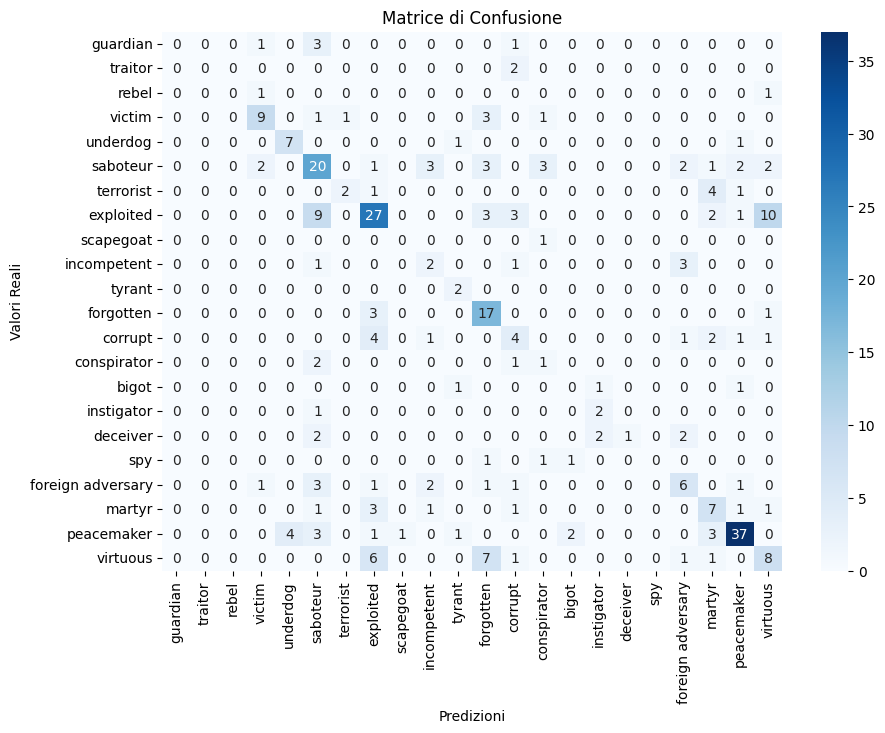

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 7))  # Impostiamo la dimensione della figura
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=set(y_true), yticklabels=set(y_true))
plt.title("Matrice di Confusione")
plt.xlabel("Predizioni")
plt.ylabel("Valori Reali")

print(len)

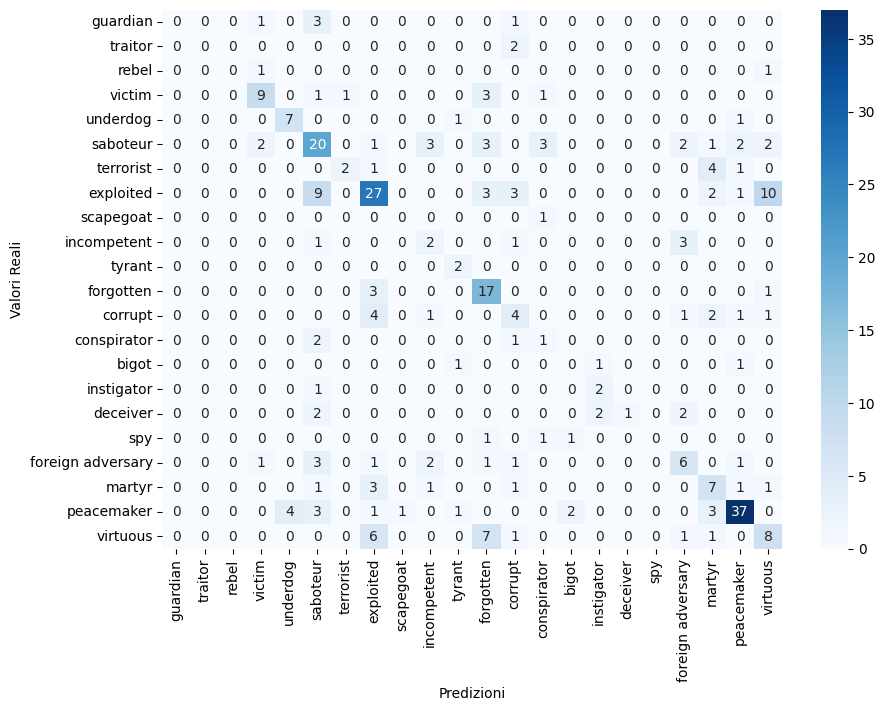

Matrice di confusione salvata come immagine.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crea la figura
plt.figure(figsize=(10, 7))  # Impostiamo la dimensione della figura

# Crea la heatmap
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=set(y_true), yticklabels=set(y_true))

# Aggiungi titolo e etichette
plt.xlabel("Predizioni")
plt.ylabel("Valori Reali")

# Salva l'immagine in un file
plt.savefig("matrice_confusione.png", bbox_inches='tight')

# Mostra l'immagine
plt.show()

print("Matrice di confusione salvata come immagine.")
